In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

In [19]:
master=pd.read_csv('churn.csv')

In [2]:
df_cluster=pd.read_csv('churn.csv')

In [3]:
df_cluster.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_cluster=df_cluster[['tenure','MonthlyCharges','Churn']]

In [5]:
df_cluster=pd.get_dummies(df_cluster, drop_first=True)

# Scaler

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
scaler=StandardScaler()

In [8]:
data_scaled=scaler.fit_transform(df_cluster.drop('Churn_Yes',axis=1))

In [9]:
data_scaled=pd.DataFrame(data_scaled)

# Unsupervised CLustering

## K Means

In [10]:
from sklearn.cluster import KMeans

### Check N value

In [11]:
inertia_list=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

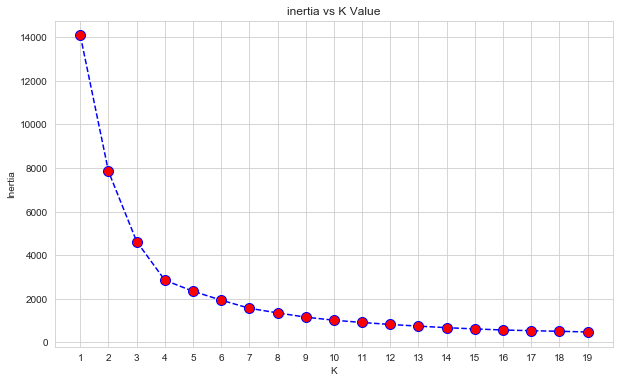

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), inertia_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('inertia vs K Value')
plt.xticks(range(1,20,1))
plt.xlabel('K')
plt.ylabel('Inertia')

### Silhouette score

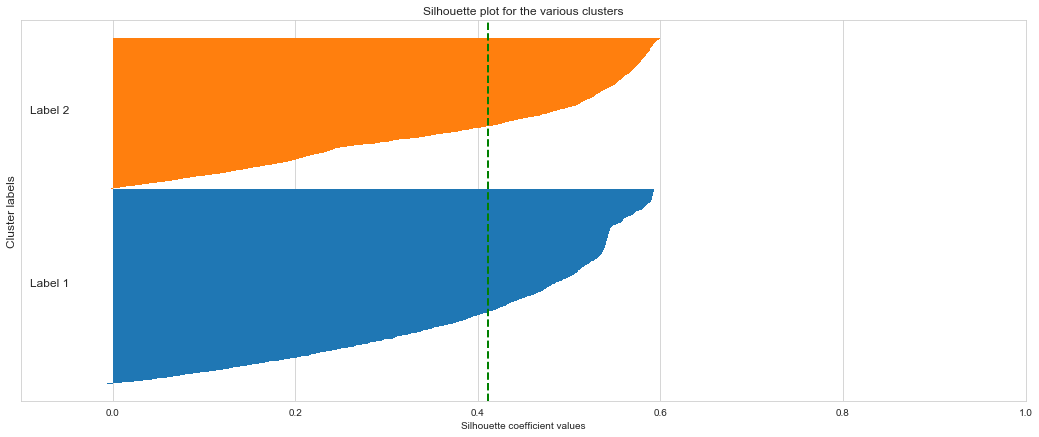

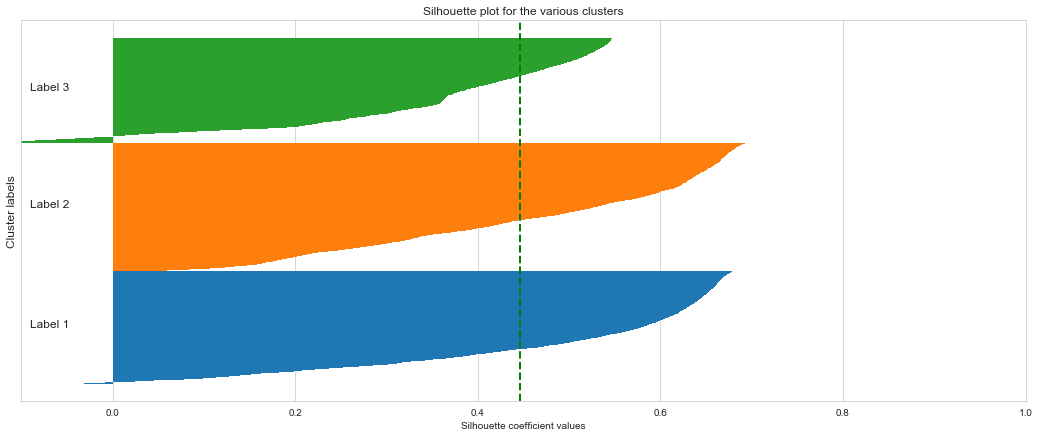

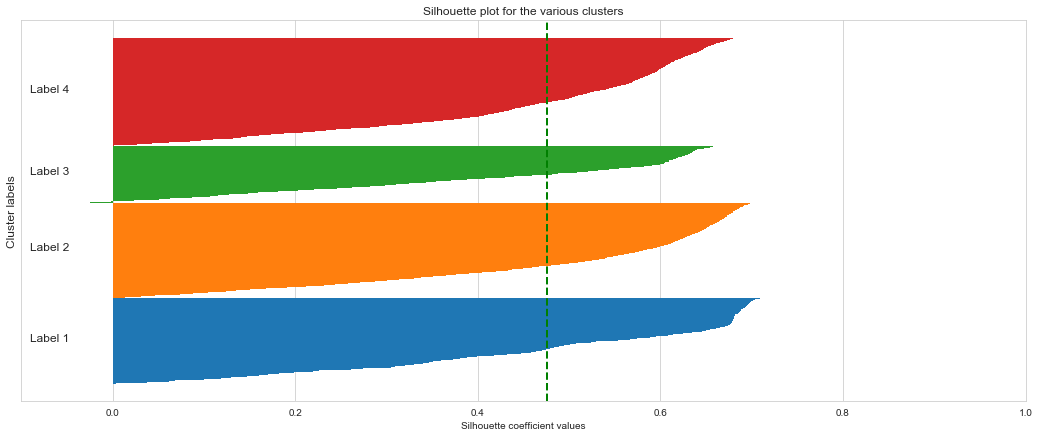

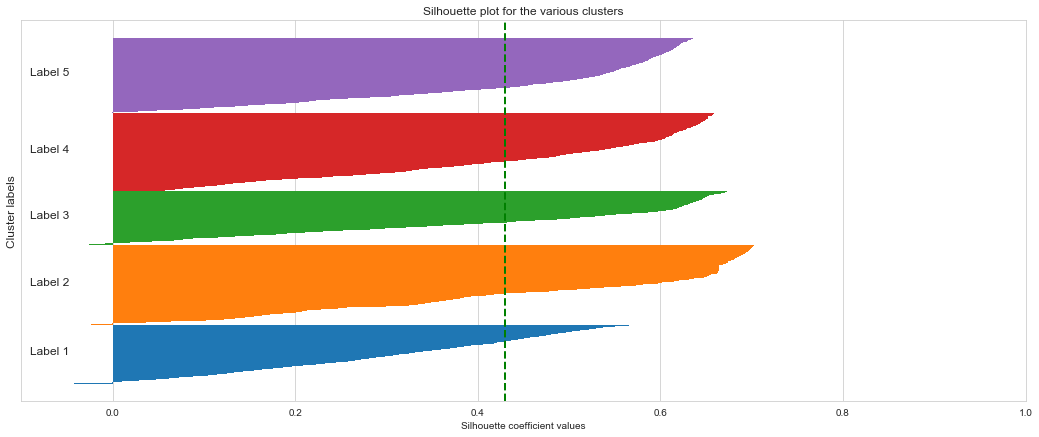

In [13]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate(list(range(2,6))):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(data_scaled)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(data_scaled, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.09, (y_lower + y_upper) / 2, 'Label '+str(i + 1), fontsize = 12)
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels', fontsize = 12)
    ax1.set_title('Silhouette plot for the various clusters');


### Clustering

In [14]:
kmeans = KMeans(n_clusters=4)

In [15]:
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
label_export=pd.DataFrame(kmeans.labels_)

In [49]:
label_export.to_csv('label.csv')

In [16]:
df_cluster['label kmeans']=kmeans.labels_

In [17]:
df_cluster.head()

,tenure,MonthlyCharges,Churn_Yes,label kmeans
0,1,29.85,0,0
1,34,56.95,0,3
2,2,53.85,1,0
3,45,42.30,0,3
4,2,70.70,1,2


Text(0, 0.5, 'Monthly Charges')

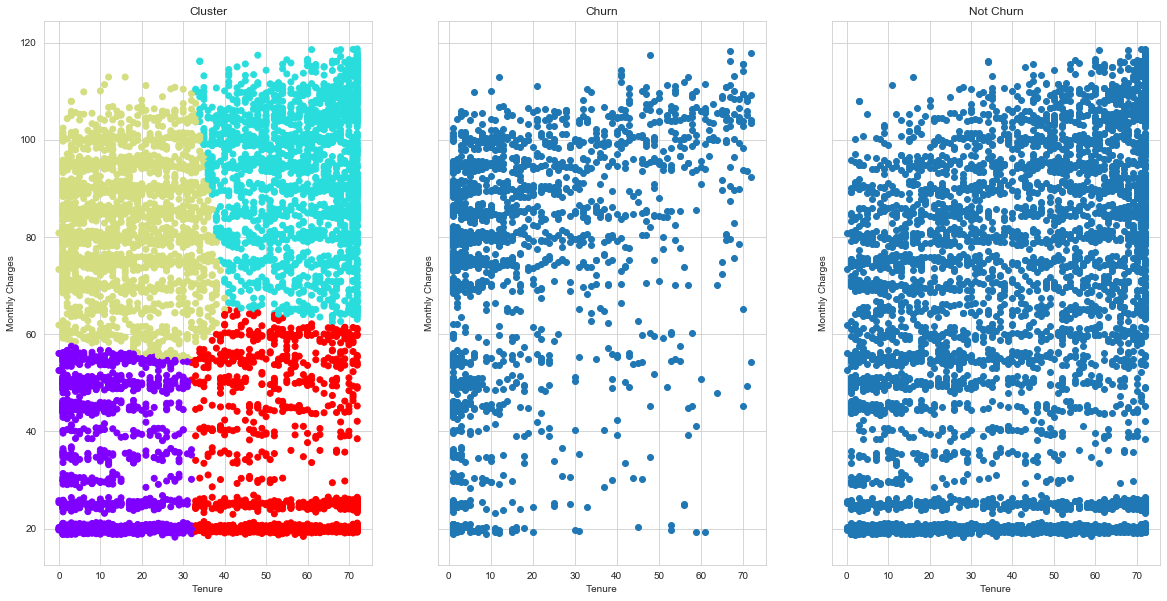

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(20,10))
ax1.set_title('Cluster')
ax1.scatter(df_cluster['tenure'], df_cluster['MonthlyCharges'], c=df_cluster['label kmeans'], cmap='rainbow')
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Monthly Charges')

ax2.set_title('Churn')
ax2.scatter(df_cluster[df_cluster['Churn_Yes']==1]['tenure'], df_cluster[df_cluster['Churn_Yes']==1]['MonthlyCharges'], label='Yes')
ax2.set_xlabel('Tenure')
ax2.set_ylabel('Monthly Charges')

ax3.set_title('Not Churn')
ax3.scatter(df_cluster[df_cluster['Churn_Yes']==0]['tenure'], df_cluster[df_cluster['Churn_Yes']==0]['MonthlyCharges'], label='No')
ax3.set_xlabel('Tenure')
ax3.set_ylabel('Monthly Charges')


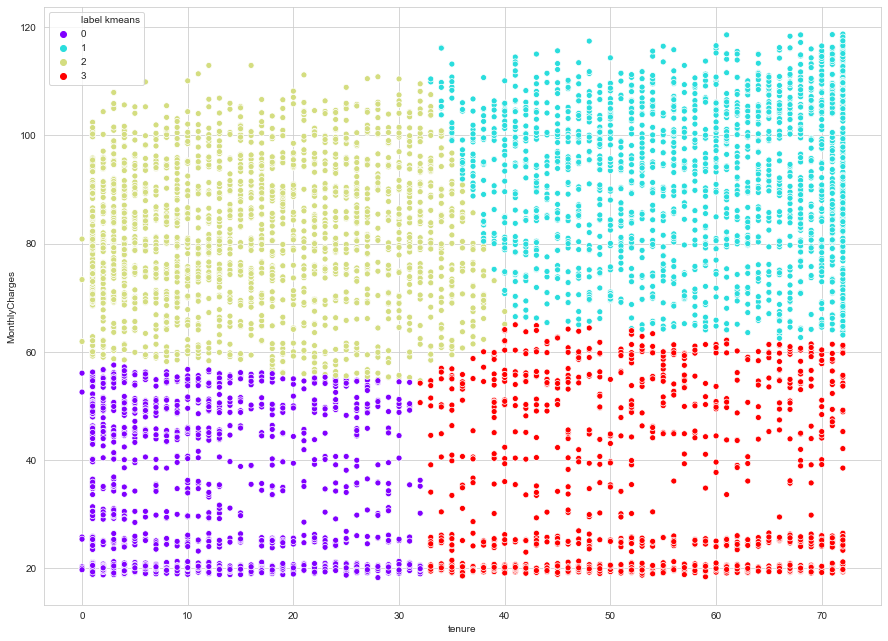

In [42]:
plt.figure(figsize=(15,11))
sns.scatterplot(df_cluster['tenure'], df_cluster['MonthlyCharges'], hue=df_cluster['label kmeans'],palette='rainbow')

In [21]:
master['label']=df_cluster['label kmeans']

In [25]:
label0=master[master['label']==0]
label1=master[master['label']==1]
label2=master[master['label']==2]
label3=master[master['label']==3]

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


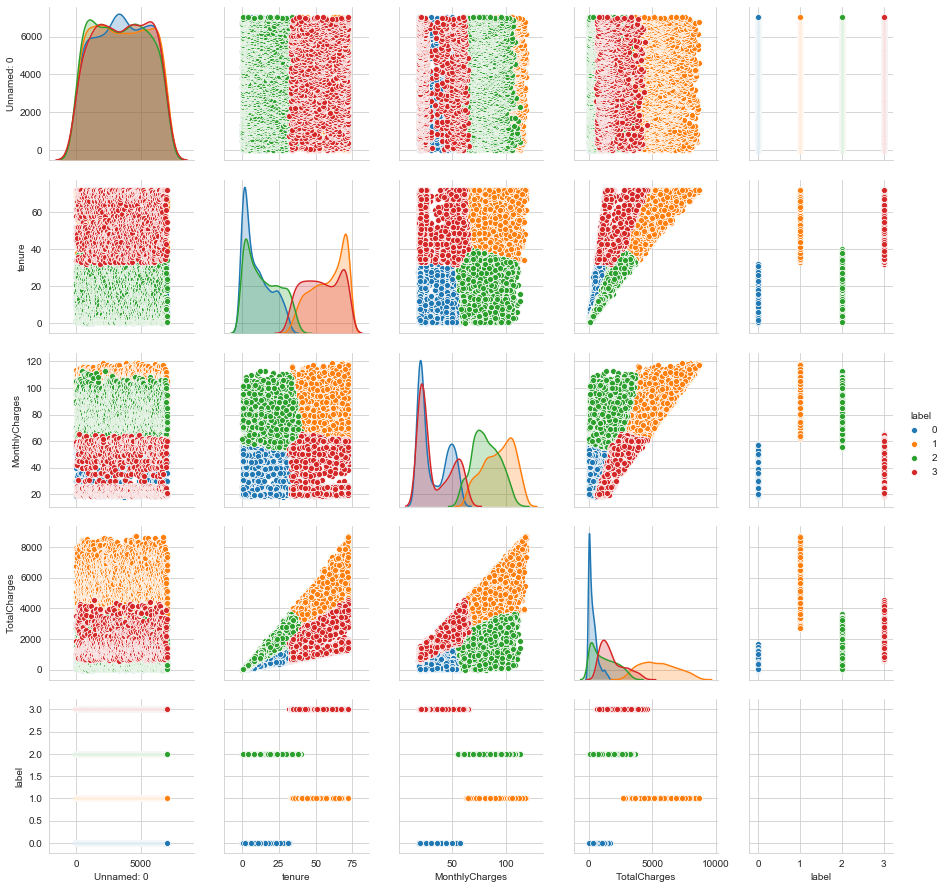

In [31]:
sns.pairplot(master, hue='label')

In [43]:
label1.describe(include=[np.object])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,1953,1953,1953,1953,1953,1953,1953,1953,1953,1953,1953,1953,1953,1953,1953,1953,1953
unique,2,2,2,2,2,3,2,2,2,2,2,2,2,3,2,4,2
top,Male,No,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No
freq,979,1533,1331,1303,1929,1476,1369,1053,1327,1338,1087,1432,1435,824,1379,612,1647


In [ ]:
non_numeric=churn[['Gender','SeniorCitizen','']]